In [1]:
import pandas as pd
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import statsmodels
from skbio.stats.ordination import pcoa 
from scipy.spatial import distance
from matplotlib.lines import Line2D
from sklearn.metrics import confusion_matrix
import pyreadr
import warnings
from scipy.spatial.distance import braycurtis
from scipy.spatial.distance import pdist, squareform
from skbio.stats.ordination import pcoa 
from sklearn.metrics import precision_score, recall_score
warnings.filterwarnings("ignore")
from skbio.stats.composition import clr
from scipy.stats import wilcoxon
from statsmodels.stats import multitest

In [7]:
results_dir = glob.glob('/Users/zkarwowska/new_embl_folder/zeevi_dataset_v5/results/results_files/one_arm/*csv')

ONE_ARM_FILES = []
for file in results_dir:
    df = pd.read_csv(file, index_col = [0])
    ONE_ARM_FILES.append(df)


ONE_ARM_FILES_DF = pd.concat(ONE_ARM_FILES)
ONE_ARM_FILES_DF['transformation'] = ONE_ARM_FILES_DF['transformation'].replace(np.nan, '')
ONE_ARM_FILES_DF['model_name'] = ONE_ARM_FILES_DF.model + '.' + ONE_ARM_FILES_DF.transformation

ONE_ARM_FILES_DF = ONE_ARM_FILES_DF.rename({'auc':"ROC-AUC",
                        'precision':"Precision",
                        'recall':"Recall"}, axis=1)

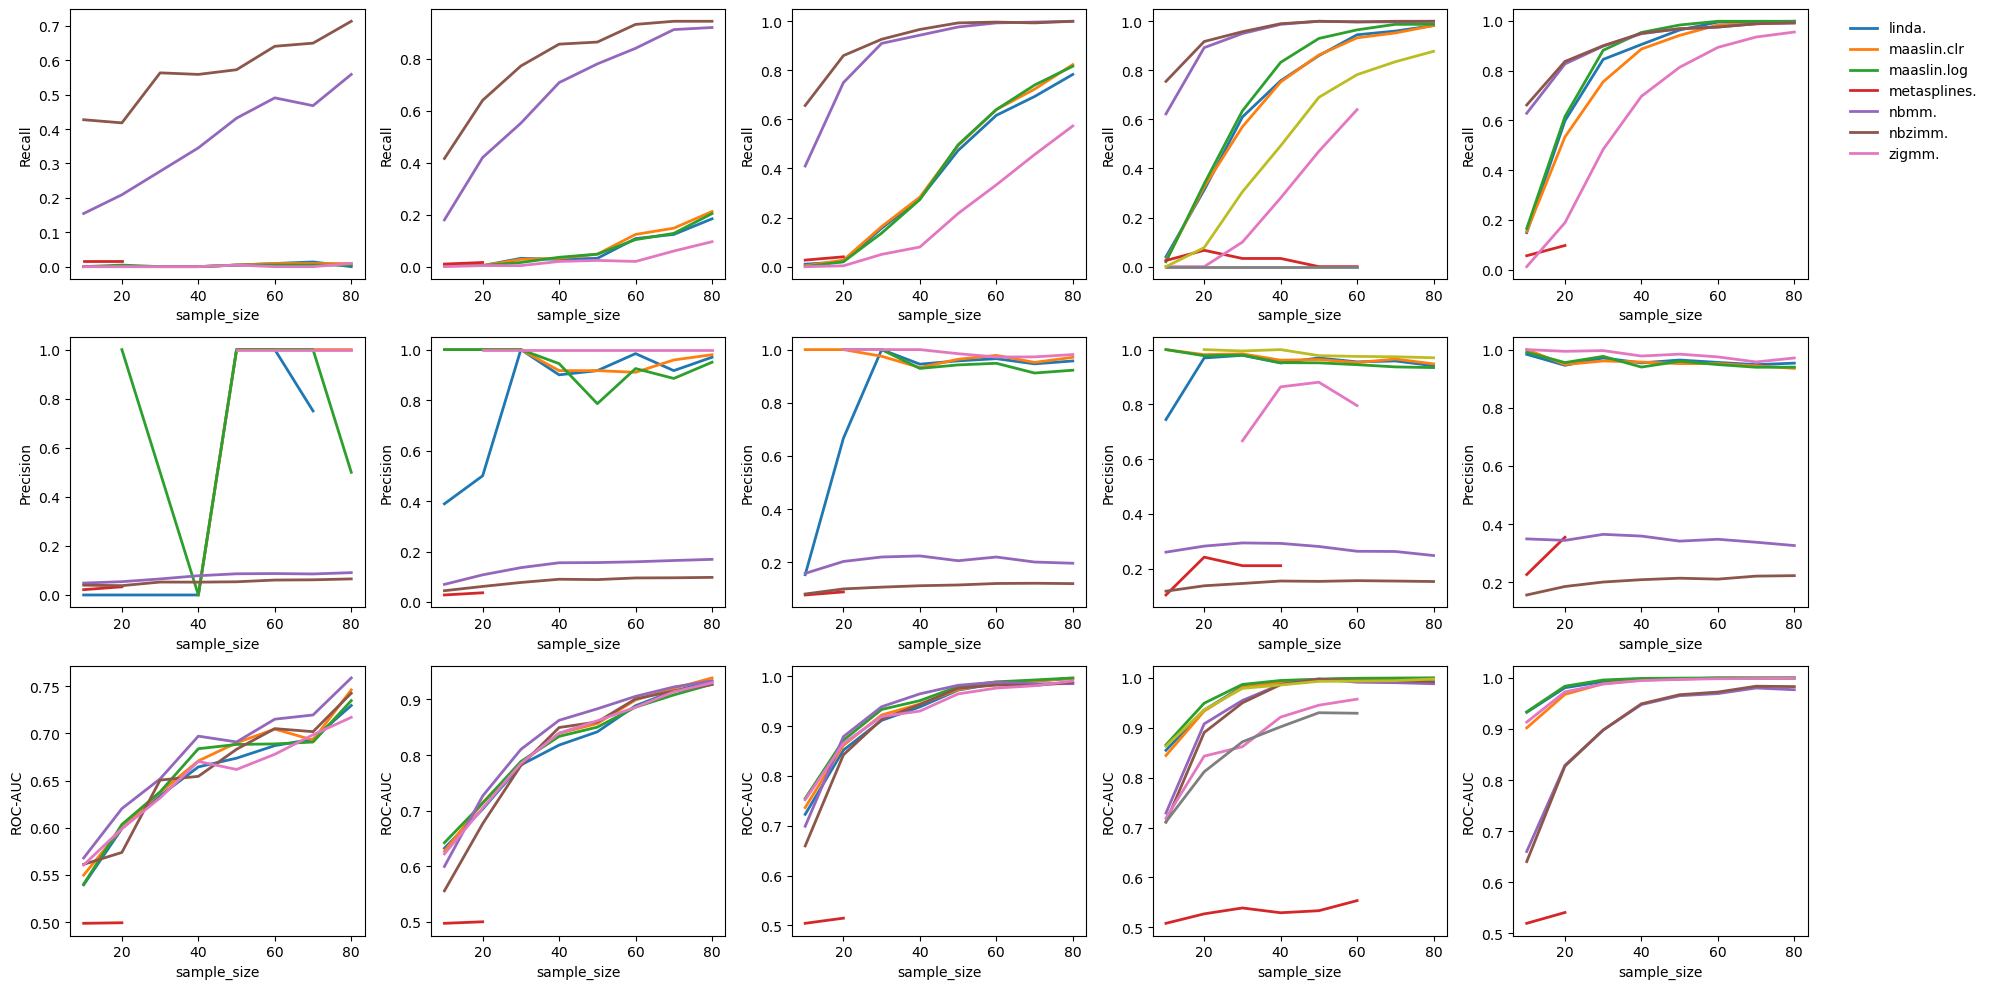

In [62]:
merged_df1 = (ONE_ARM_FILES_DF[(ONE_ARM_FILES_DF['effect_size'] == 125) & (ONE_ARM_FILES_DF['sampling'] == 4)]
             .drop(columns = ['effect_size', 'model', 'transformation', 'version'])
             .groupby(by = ['sample_size', 'sampling', 'model_name'])
             .mean()).reset_index()

merged_df2 = (ONE_ARM_FILES_DF[(ONE_ARM_FILES_DF['effect_size'] == 15) & (ONE_ARM_FILES_DF['sampling'] == 4)]
             .drop(columns = ['effect_size', 'model', 'transformation', 'version'])
             .groupby(by = ['sample_size', 'sampling', 'model_name'])
             .mean()).reset_index()

merged_df3 = (ONE_ARM_FILES_DF[(ONE_ARM_FILES_DF['effect_size'] == 2) & (ONE_ARM_FILES_DF['sampling'] == 4)]
             .drop(columns = ['effect_size', 'model', 'transformation', 'version'])
             .groupby(by = ['sample_size', 'sampling', 'model_name'])
             .mean()).reset_index()

merged_df4 = (ONE_ARM_FILES_DF[(ONE_ARM_FILES_DF['effect_size'] == 3) & (ONE_ARM_FILES_DF['sampling'] == 4)]
             .drop(columns = ['effect_size', 'model', 'transformation', 'version'])
             .groupby(by = ['sample_size', 'sampling', 'model_name'])
             .mean()).reset_index()

merged_df5 = (ONE_ARM_FILES_DF[(ONE_ARM_FILES_DF['effect_size'] == 5) & (ONE_ARM_FILES_DF['sampling'] == 4)]
             .drop(columns = ['effect_size', 'model', 'transformation', 'version'])
             .groupby(by = ['sample_size', 'sampling', 'model_name'])
             .mean()).reset_index()


fig, axes = plt.subplots(3, 5, figsize = (20, 10))

sns.lineplot(data=merged_df1, x = 'sample_size', y = 'Recall', hue = 'model_name', ax=axes[0, 0], legend=False, lw=2)
sns.lineplot(data=merged_df1, x = 'sample_size', y = 'Precision', hue = 'model_name', ax=axes[1, 0], legend=False, lw=2)
sns.lineplot(data=merged_df1, x = 'sample_size', y = 'ROC-AUC', hue = 'model_name', ax=axes[2, 0], legend=False, lw=2)

sns.lineplot(data=merged_df2, x = 'sample_size', y = 'Recall', hue = 'model_name', ax=axes[0, 1], legend=False, lw=2)
sns.lineplot(data=merged_df2, x = 'sample_size', y = 'Precision', hue = 'model_name', ax=axes[1, 1], legend=False, lw=2)
sns.lineplot(data=merged_df2, x = 'sample_size', y = 'ROC-AUC', hue = 'model_name', ax=axes[2, 1], legend=False, lw=2)

sns.lineplot(data=merged_df3, x = 'sample_size', y = 'Recall', hue = 'model_name', ax=axes[0, 2], legend=False, lw=2)
sns.lineplot(data=merged_df3, x = 'sample_size', y = 'Precision', hue = 'model_name', ax=axes[1, 2], legend=False, lw=2)
sns.lineplot(data=merged_df3, x = 'sample_size', y = 'ROC-AUC', hue = 'model_name', ax=axes[2, 2], legend=False, lw=2)

sns.lineplot(data=merged_df4, x = 'sample_size', y = 'Recall', hue = 'model_name', ax=axes[0, 3], legend=False, lw=2)
sns.lineplot(data=merged_df4, x = 'sample_size', y = 'Precision', hue = 'model_name', ax=axes[1, 3], legend=False, lw=2)
sns.lineplot(data=merged_df4, x = 'sample_size', y = 'ROC-AUC', hue = 'model_name', ax=axes[2, 3], legend=False, lw=2)

sns.lineplot(data=merged_df5, x = 'sample_size', y = 'Recall', hue = 'model_name', ax=axes[0, 4], legend=True, lw=2)
sns.lineplot(data=merged_df5, x = 'sample_size', y = 'Precision', hue = 'model_name', ax=axes[1, 4], legend=False, lw=2)
sns.lineplot(data=merged_df5, x = 'sample_size', y = 'ROC-AUC', hue = 'model_name', ax=axes[2, 4], legend=False, lw=2)

axes[0, 4].legend(bbox_to_anchor = (1.1, 1), edgecolor='w')
plt.tight_layout()

## BY SAMPLING

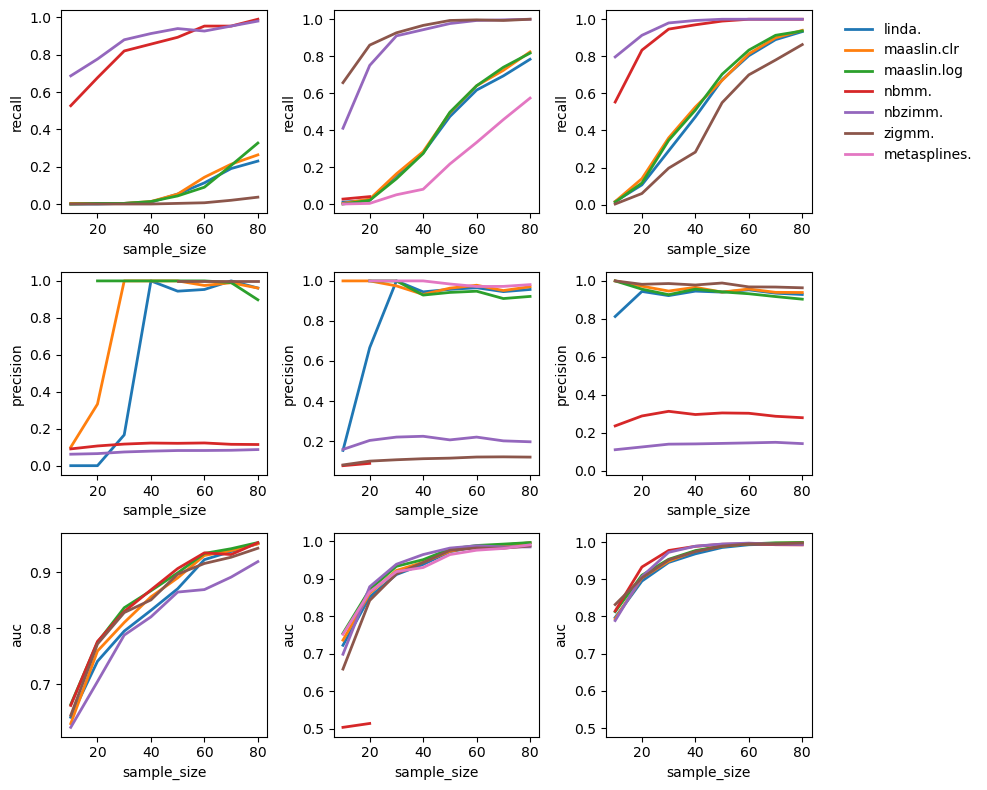

In [54]:
merged_df1 = (ONE_ARM_FILES_DF[(ONE_ARM_FILES_DF['sampling'] == 2) & (ONE_ARM_FILES_DF['effect_size'] == 2)]
             .drop(columns = ['effect_size', 'model', 'transformation', 'version'])
             .groupby(by = ['sample_size', 'sampling', 'model_name'])
             .mean()).reset_index()

merged_df2 = (ONE_ARM_FILES_DF[(ONE_ARM_FILES_DF['sampling'] == 4) & (ONE_ARM_FILES_DF['effect_size'] == 2)]
             .drop(columns = ['effect_size', 'model', 'transformation', 'version'])
             .groupby(by = ['sample_size', 'sampling', 'model_name'])
             .mean()).reset_index()

merged_df3 = (ONE_ARM_FILES_DF[(ONE_ARM_FILES_DF['sampling'] == 6) & (ONE_ARM_FILES_DF['effect_size'] == 2)]
             .drop(columns = ['effect_size', 'model', 'transformation', 'version'])
             .groupby(by = ['sample_size', 'sampling', 'model_name'])
             .mean()).reset_index()

fig, axes = plt.subplots(3, 3, figsize = (10, 8))

sns.lineplot(data=merged_df1, x = 'sample_size', y = 'recall', hue = 'model_name', ax=axes[0, 0], legend=False, lw=2)
sns.lineplot(data=merged_df1, x = 'sample_size', y = 'precision', hue = 'model_name', ax=axes[1, 0], legend=False, lw=2)
sns.lineplot(data=merged_df1, x = 'sample_size', y = 'auc', hue = 'model_name', ax=axes[2, 0], legend=False, lw=2)

sns.lineplot(data=merged_df2, x = 'sample_size', y = 'recall', hue = 'model_name', ax=axes[0, 1], legend=False, lw=2)
sns.lineplot(data=merged_df2, x = 'sample_size', y = 'precision', hue = 'model_name', ax=axes[1, 1], legend=False, lw=2)
sns.lineplot(data=merged_df2, x = 'sample_size', y = 'auc', hue = 'model_name', ax=axes[2, 1], legend=False, lw=2)

sns.lineplot(data=merged_df3, x = 'sample_size', y = 'recall', hue = 'model_name', ax=axes[0, 2], legend=True, lw=2)
sns.lineplot(data=merged_df3, x = 'sample_size', y = 'precision', hue = 'model_name', ax=axes[1, 2], legend=False, lw=2)
sns.lineplot(data=merged_df3, x = 'sample_size', y = 'auc', hue = 'model_name', ax=axes[2, 2], legend=False, lw=2)

axes[0, 2].legend(bbox_to_anchor = (1.1, 1), edgecolor='w')

plt.tight_layout()